In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes(return_X_y=False, as_frame=False, scaled=False)
df = pd.DataFrame(data=np.c_[diabetes.data, diabetes.target], columns=diabetes.feature_names + ['Disease Progression'])


In [3]:
print(diabetes)

{'data': array([[59.    ,  2.    , 32.1   , ...,  4.    ,  4.8598, 87.    ],
       [48.    ,  1.    , 21.6   , ...,  3.    ,  3.8918, 69.    ],
       [72.    ,  2.    , 30.5   , ...,  4.    ,  4.6728, 85.    ],
       ...,
       [60.    ,  2.    , 24.9   , ...,  3.77  ,  4.1271, 95.    ],
       [36.    ,  1.    , 30.    , ...,  4.79  ,  5.1299, 85.    ],
       [36.    ,  1.    , 19.6   , ...,  3.    ,  4.5951, 92.    ]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,

In [4]:

# Check for missing values
missing_values = df.isnull().sum()

In [5]:
df.head()



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease Progression
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  Disease Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


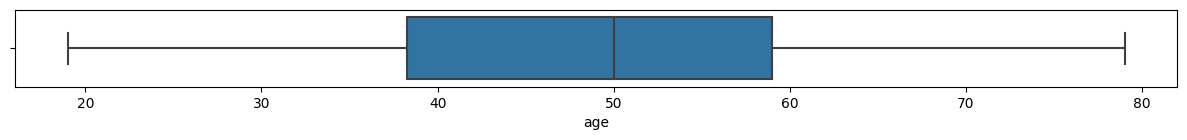

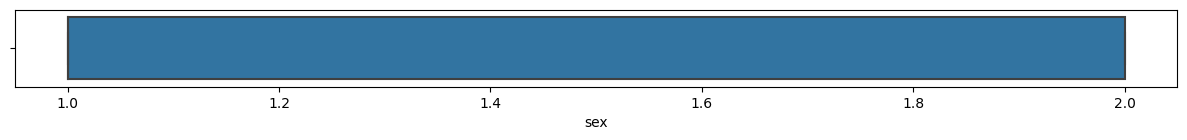

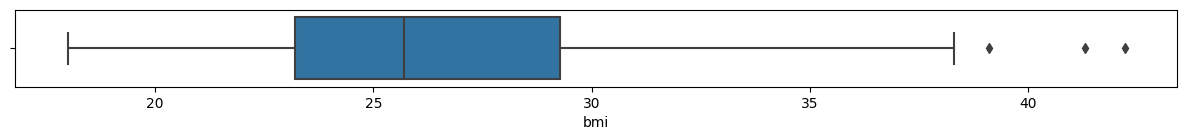

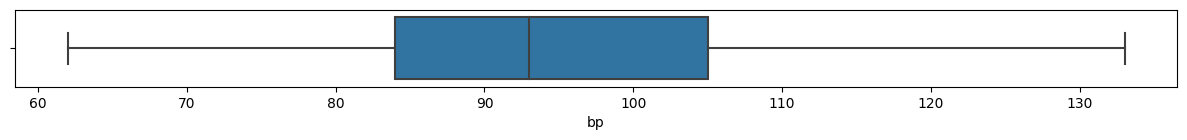

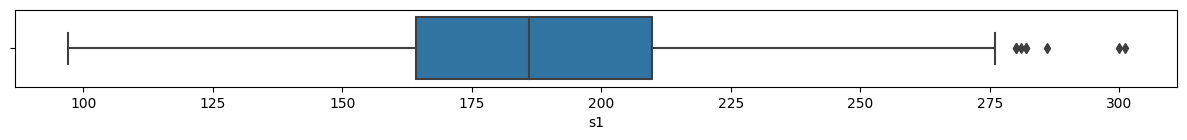

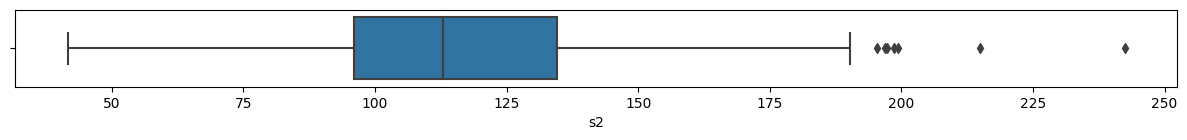

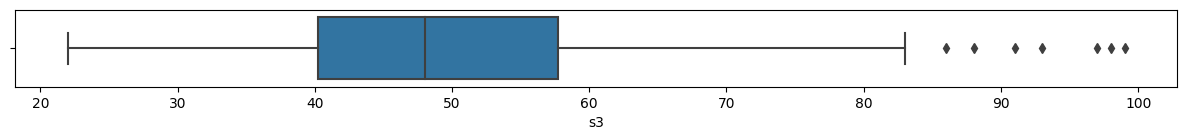

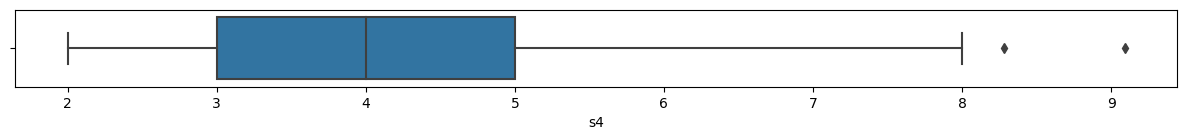

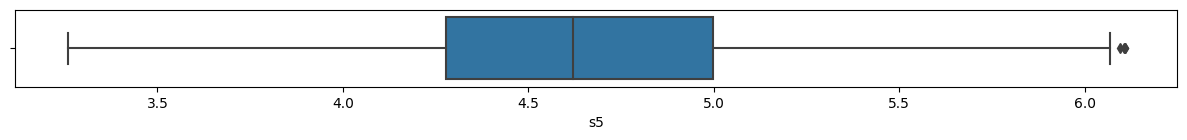

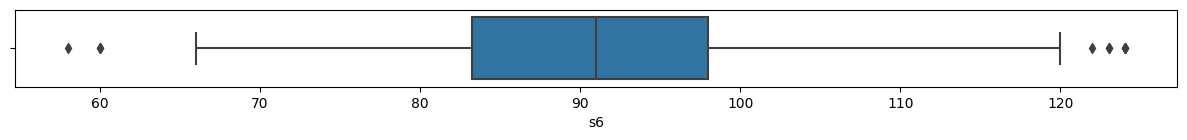

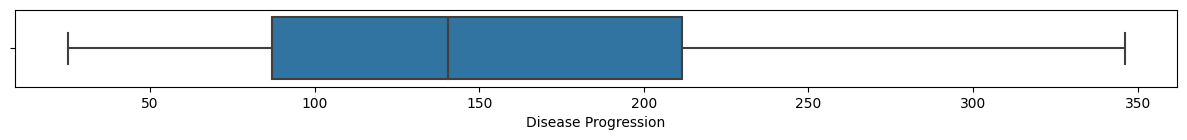

In [7]:
check_1 = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6','Disease Progression']

for i in check_1:
  plt.figure(figsize = (15,1))
  sns.boxplot(x=df[i])

In [8]:
# Define a function to apply outlier treatment using NumPy vectorized operations
def apply_outlier_treatment(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    toprange = q3 + iqr * 1.5
    botrange = q1 - iqr * 1.5
    column = np.where(column > toprange, toprange, column)
    column = np.where(column < botrange, botrange, column)
    return column

In [9]:
df[check_1] = df[check_1].apply(apply_outlier_treatment, axis=0)

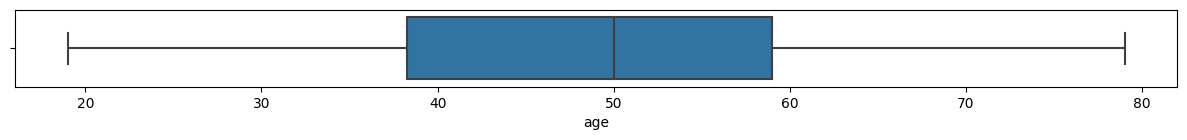

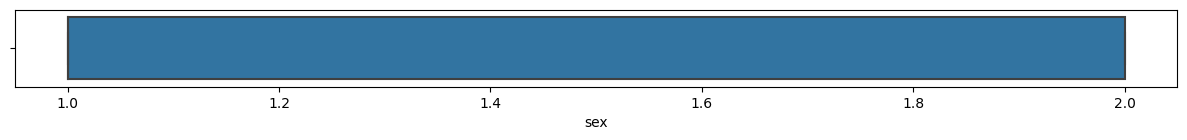

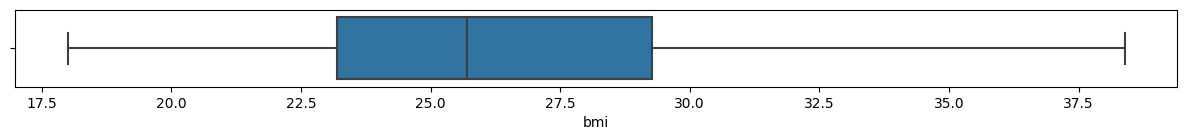

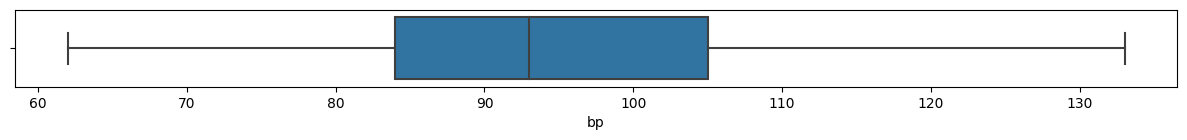

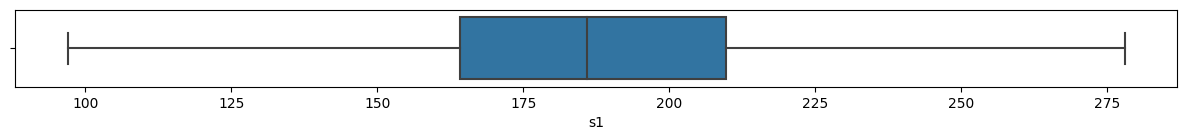

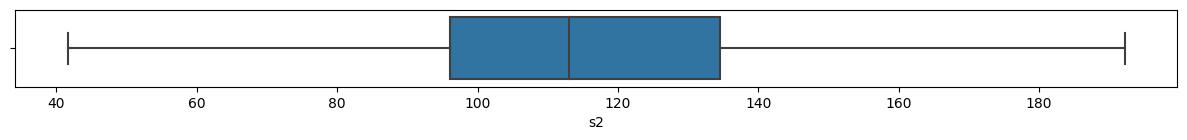

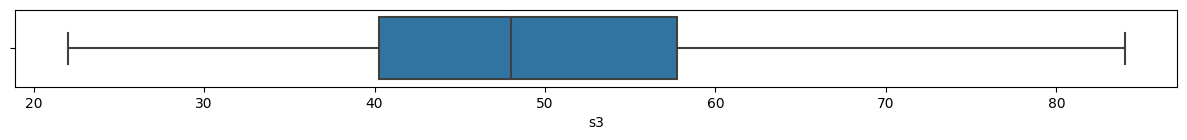

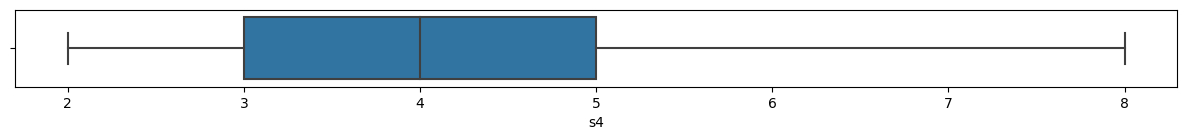

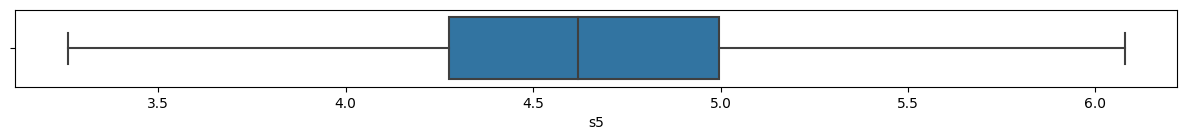

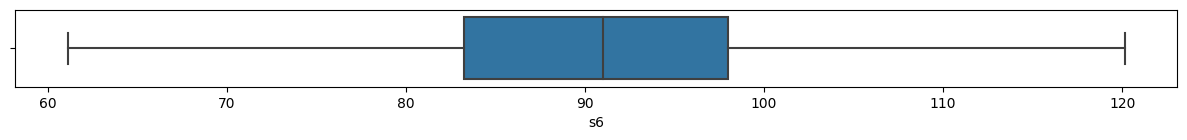

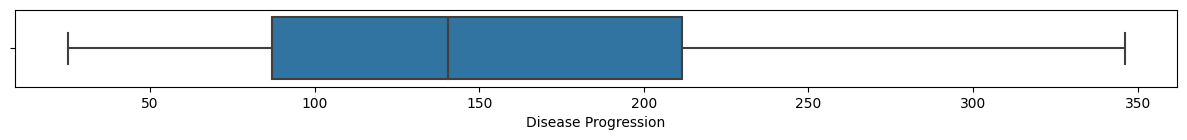

In [10]:
for i in check_1:
  plt.figure(figsize = (15,1))
  sns.boxplot(x=df[i])

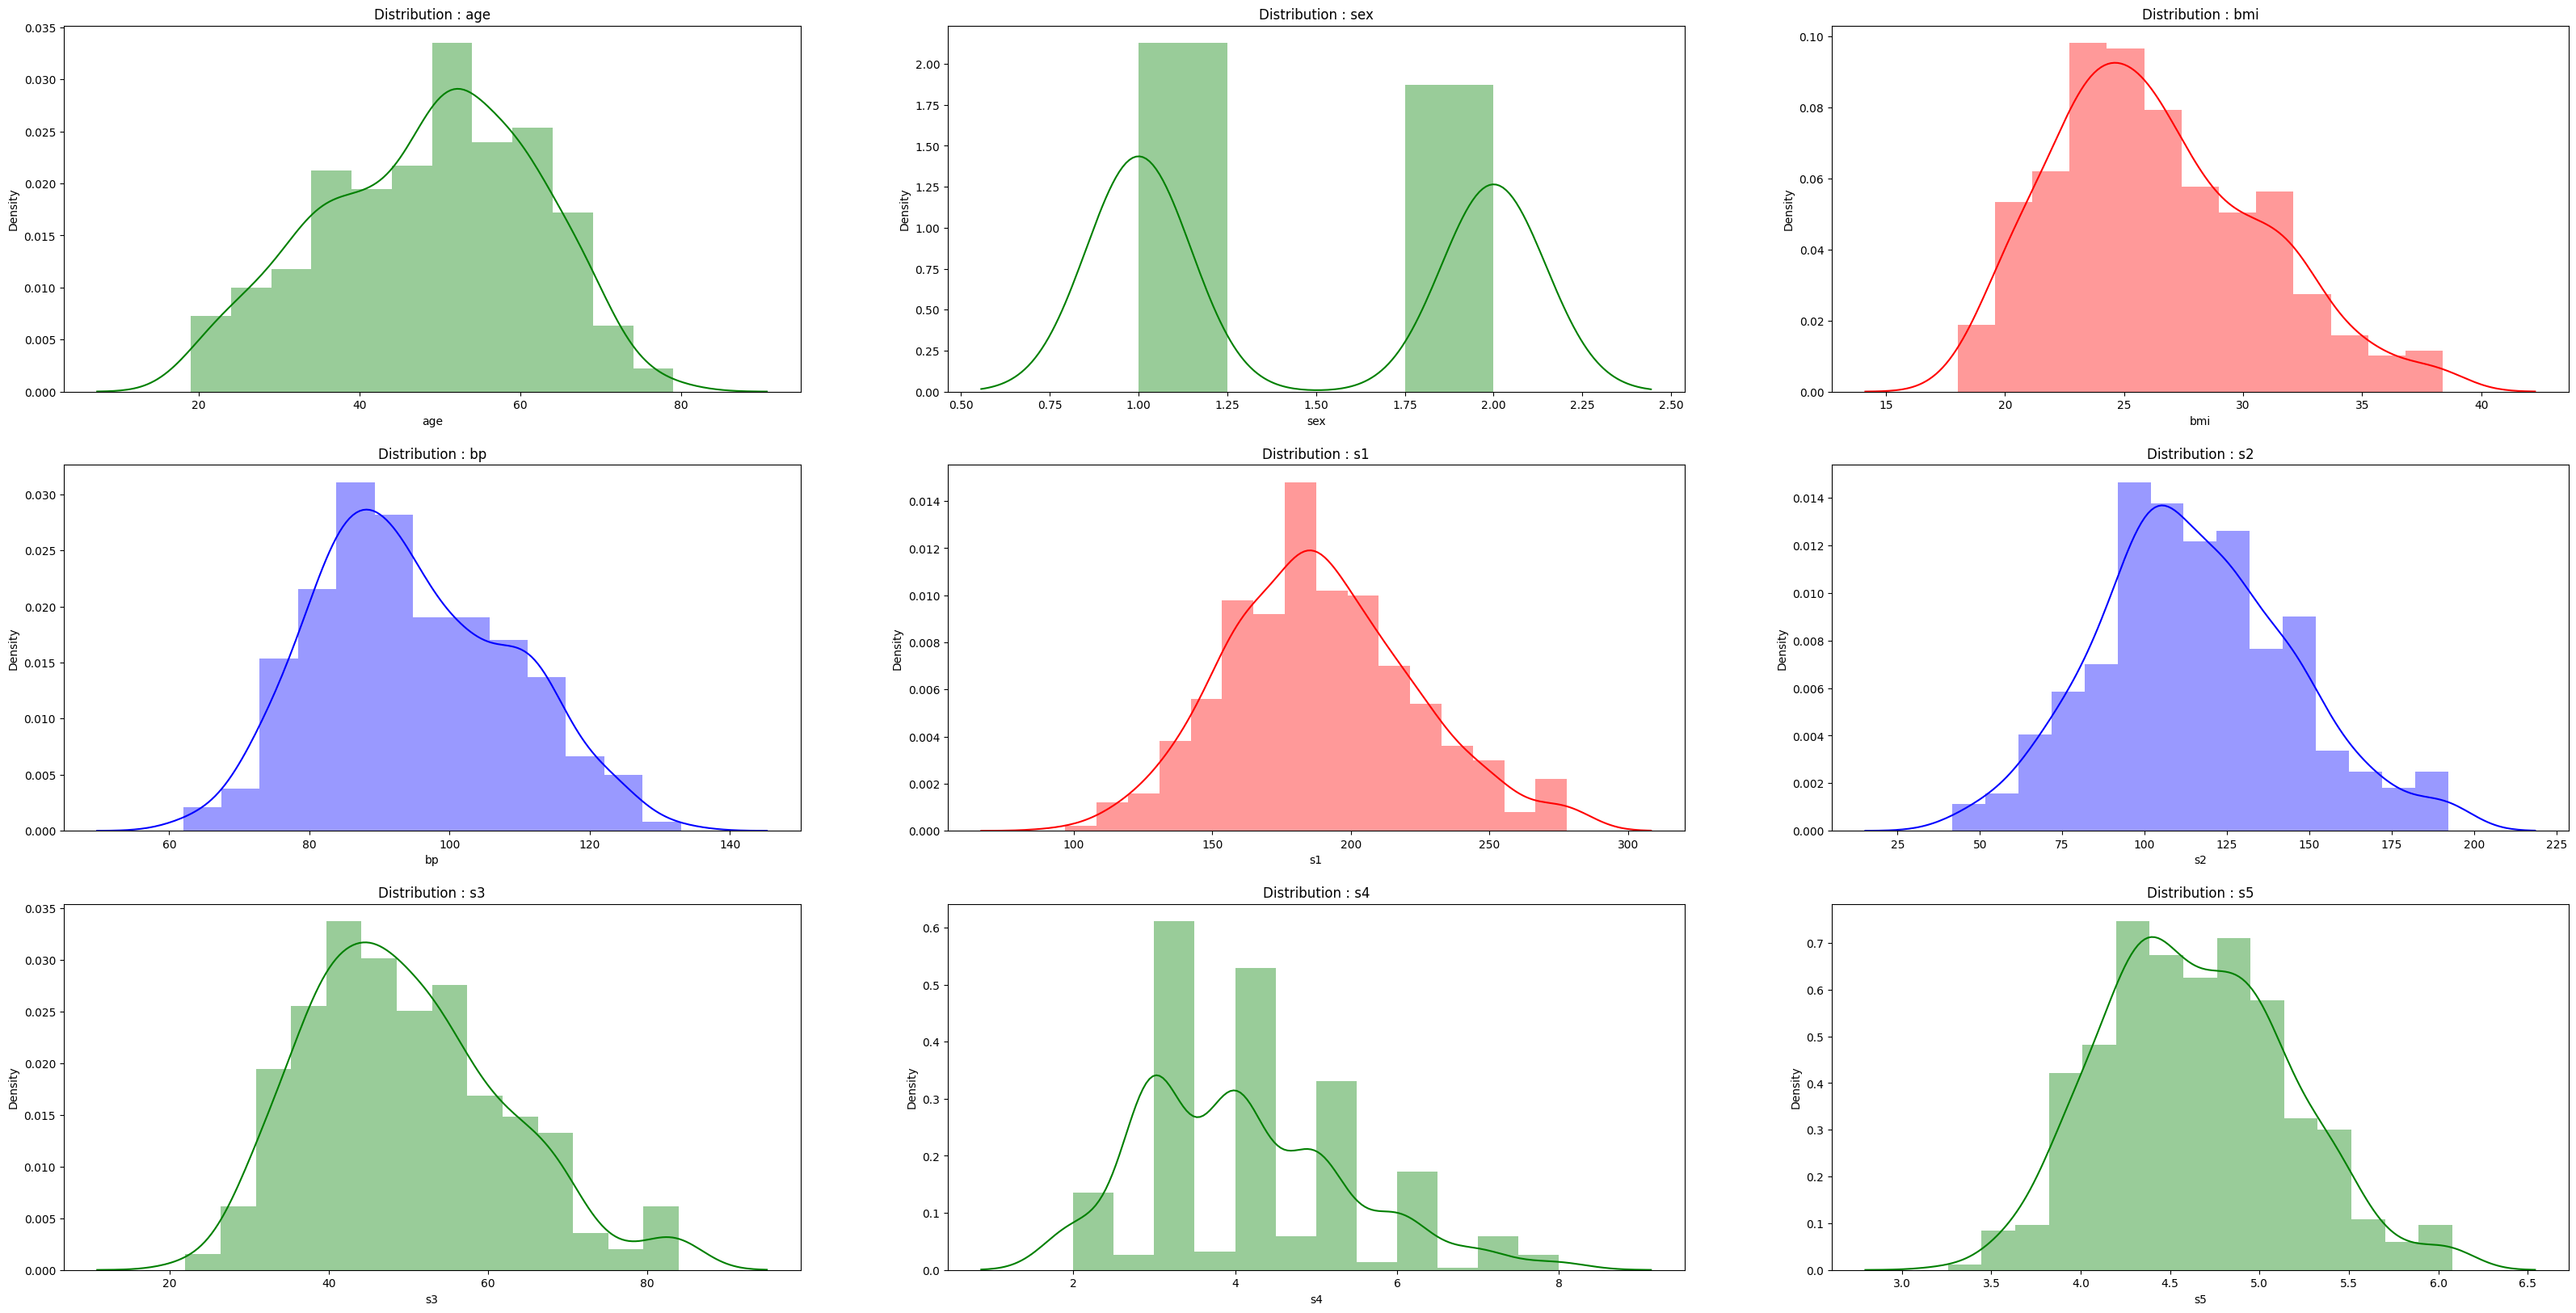

In [11]:
colors = ['Green','Green','Red','Blue','Red','Blue','Green','Green','Green']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (40,20))
for i in range(min(len(check_1), 9)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[check_1[i]],color = colors[i])
    title = 'Distribution : ' + check_1[i]
    plt.title(title)
plt.show()

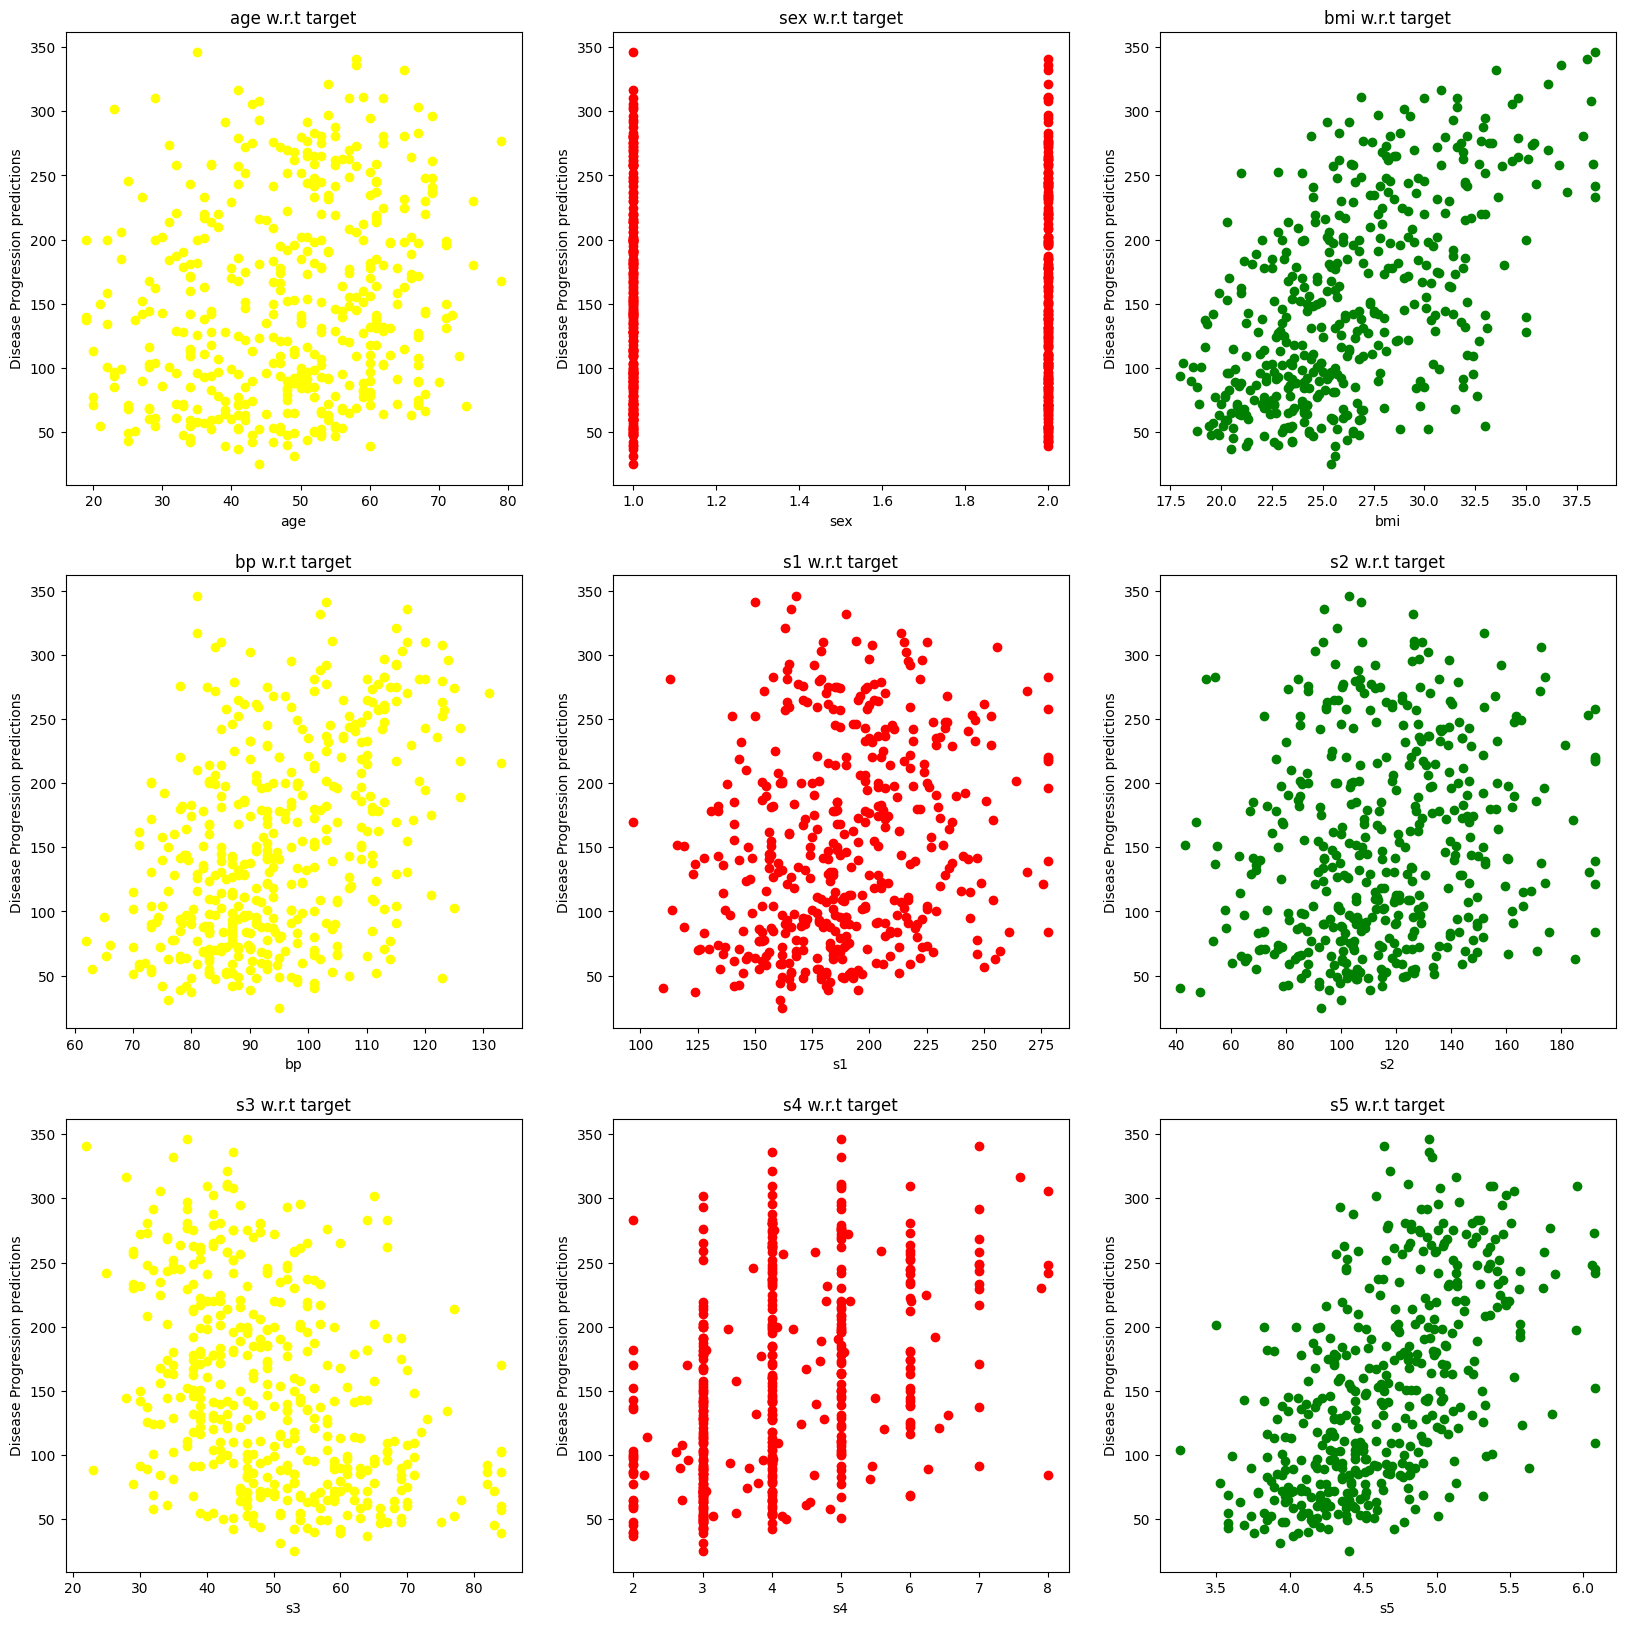

In [12]:
check_1 = []
for i in df:
  check_1.append(i)
colors = ['#E94B3C','#2D2926']
colors1 =['Yellow','Red','Green','Yellow','Red','Green','Yellow','Red','Green']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (20,20))
for i in range(min(len(check_1), 9)):
    plt.subplot(3,3,i+1)
    plt.scatter(df[check_1[i]],df["Disease Progression"],color = colors1[i])
    plt.xlabel(check_1[i])
    plt.ylabel("Disease Progression predictions")
    title = check_1[i] + ' w.r.t target'
    plt.title(title)
plt.show()
# visually inspecting the relationship between each feature and the target variable.
#This can be helpful for selecting features to include in a model or identifying potential outliers.

<Axes: >

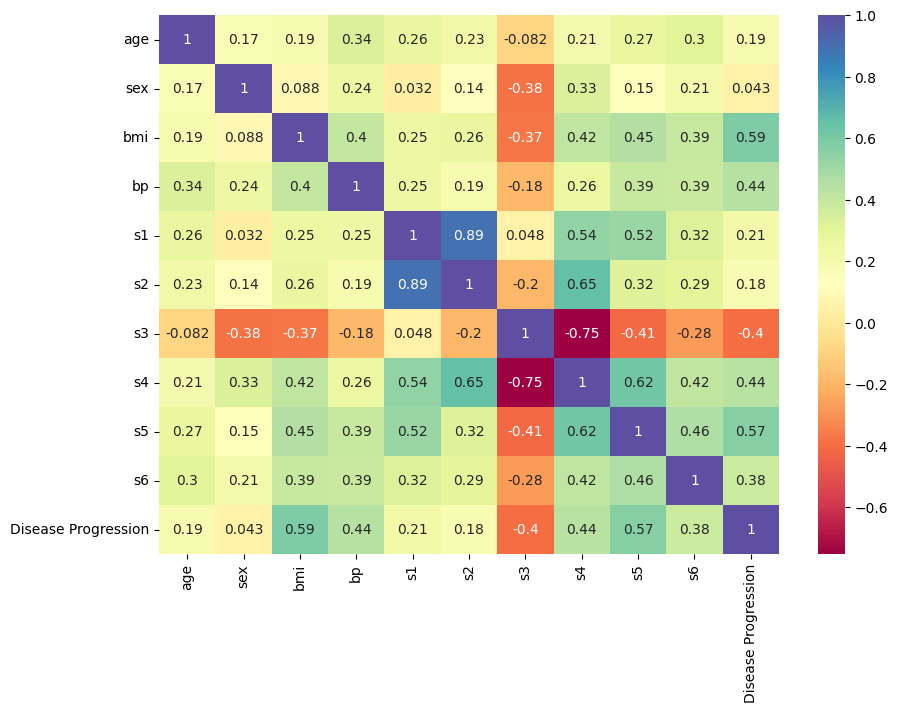

In [13]:
plt.figure(figsize=[10,7])
sns.heatmap(df.corr(),annot=True,cmap='Spectral')

<Axes: >

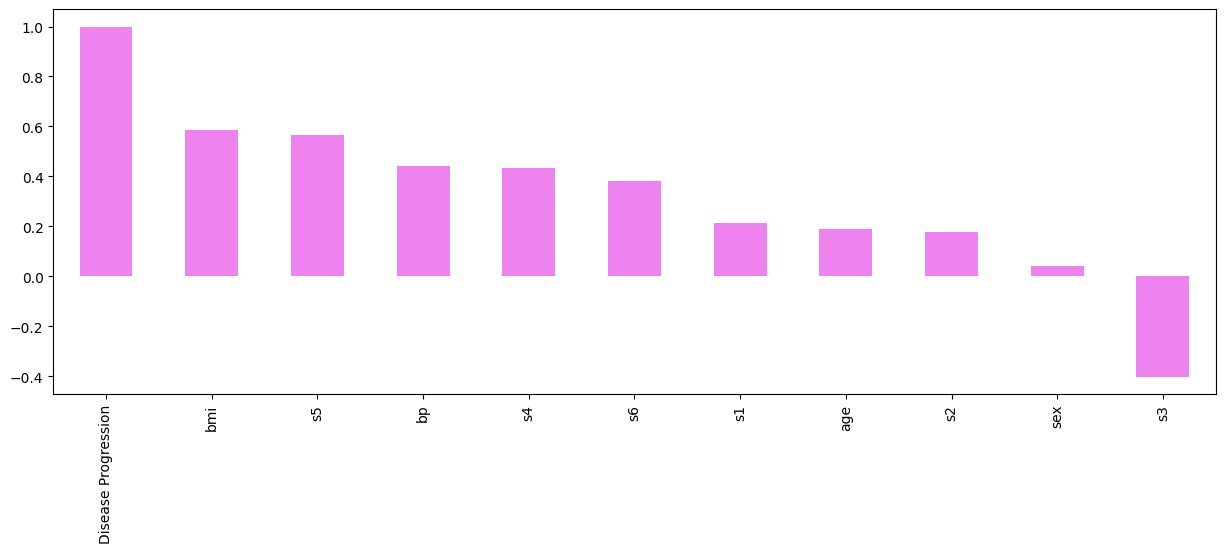

In [14]:
plt.figure(figsize=(15,5))
df.corr()['Disease Progression'].sort_values(ascending = False).plot(kind='bar',color='violet')

In [15]:
check_1 = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6','Disease Progression']
df_check_1 = df[check_1]

In [16]:
X = df_check_1.drop(columns=['Disease Progression'])  # Features
y = df_check_1['Disease Progression']  # Target label

# Initialize and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Print the top N most important features
top_n = 10  # Adjust the number of top features as needed
top_features = importance_df.head(top_n)
print(f'Top {top_n} Most Important Features:')
print(top_features)

Top 10 Most Important Features:
  Feature  Importance
8      s5    0.315704
2     bmi    0.276457
3      bp    0.087283
9      s6    0.070837
0     age    0.057849
5      s2    0.055369
6      s3    0.050657
4      s1    0.047747
7      s4    0.026163
1     sex    0.011934


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  Disease Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [19]:
# Convert your DataFrame to PyTorch tensors
X = torch.tensor(df.drop('Disease Progression', axis=1).values, dtype=torch.float32)
y = torch.tensor(df['Disease Progression'].values, dtype=torch.float32)


In [20]:
# Z-score normalization for X
mean = X.mean(dim=0)
std = X.std(dim=0)
X = (X - mean) / std


In [21]:
# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Define a simple neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.fc(x)


In [23]:
# Create data loaders for training and validation
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=32)

In [24]:
# Define the model, loss function, and optimizer
model = NeuralNet(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [25]:
## Training the model (you can adjust the number of epochs)
epochs = 100
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}] - Training Loss: {running_loss / len(train_loader)}")


Epoch [1/100] - Training Loss: 31669.421712239582
Epoch [2/100] - Training Loss: 32369.660807291668
Epoch [3/100] - Training Loss: 24969.78202311198
Epoch [4/100] - Training Loss: 24570.817423502605
Epoch [5/100] - Training Loss: 25362.20556640625
Epoch [6/100] - Training Loss: 22362.432378133137
Epoch [7/100] - Training Loss: 22398.227945963543
Epoch [8/100] - Training Loss: 26912.205322265625
Epoch [9/100] - Training Loss: 20386.51102701823
Epoch [10/100] - Training Loss: 23195.393229166668
Epoch [11/100] - Training Loss: 19557.709391276043
Epoch [12/100] - Training Loss: 18143.302286783855
Epoch [13/100] - Training Loss: 17584.223747253418
Epoch [14/100] - Training Loss: 17046.385045369465
Epoch [15/100] - Training Loss: 16970.481404622395
Epoch [16/100] - Training Loss: 17860.044108072918
Epoch [17/100] - Training Loss: 16145.0693359375
Epoch [18/100] - Training Loss: 15558.106119791666
Epoch [19/100] - Training Loss: 14956.512939453125
Epoch [20/100] - Training Loss: 14200.2311458

In [26]:
# Extract feature importance (correlation)
feature_importance = model.fc.weight.squeeze().detach().numpy()
correlation_with_target = np.abs(feature_importance)


In [27]:
# Sort the features by importance
sorted_features = np.argsort(correlation_with_target)[::-1]


In [28]:
# Print the most important features
print("Feature Importance (Correlation with 'Disease Progression'):")
for idx in sorted_features:
    print(df.columns[idx], correlation_with_target[idx])

Feature Importance (Correlation with 'Disease Progression'):
bmi 3.2379653
s5 2.4682562
s6 2.378666
sex 1.8343331
s3 1.276616
s2 0.9867986
bp 0.91155684
age 0.5921591
s1 0.27633
s4 0.25492573


In [29]:
# Define loss functions and optimizers
loss_functions = [nn.MSELoss(), nn.L1Loss()]
optimizers = [optim.SGD, optim.Adam, optim.RMSprop]



In [50]:
# Define models

# Multi-Layer Perceptron (MLP) Model
class MLPModel(nn.Module):
    def __init__(self, input_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.fc(x)

# Deep Neural Network (DNN) Model
class DNNModel(nn.Module):
    def __init__(self, input_size):
        super(DNNModel, self).__init__()
        # Define your deep network with at least 2 hidden layers
        # Example architecture: input -> 64 -> 32 -> 1
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

best_model = None
best_loss = float('inf')
best_optimizer = None
best_loss_fn = None

for loss_fn in loss_functions:
    for optimizer_fn in optimizers:
        # You can choose the model here (e.g., MLPModel, LinearRegressionModel, or DNNModel)
        model = MLPModel(X_train.shape[1])  # Choose the model here

        optimizer = optimizer_fn(model.parameters(), lr=0.001)



In [51]:
best_model = None
best_loss = float('inf')
best_optimizer = None
best_loss_fn = None
best_model_name = None  # Store the name of the best model
for loss_fn in [nn.MSELoss(), nn.L1Loss()]:
    for optimizer_fn in [optim.SGD, optim.Adam, optim.RMSprop]:
        for model_name, model_constructor in {
            "MLPModel": MLPModel,
            "LinearRegressionModel": LinearRegressionModel,
            "DNNModel": DNNModel
        }.items():
            model = model_constructor(X_train.shape[1])
            optimizer = optimizer_fn(model.parameters(), lr=0.001)

In [52]:
 # Training the model
epochs = 100
train_losses, val_losses = [], []
for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
    train_losses.append(running_train_loss / len(train_loader))

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            running_val_loss += loss.item()
        val_losses.append(running_val_loss / len(val_loader))

    print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")


Epoch [1/100] - Train Loss: 157.5032, Validation Loss: 142.0009
Epoch [2/100] - Train Loss: 137.6528, Validation Loss: 134.8832
Epoch [3/100] - Train Loss: 145.1197, Validation Loss: 125.8832
Epoch [4/100] - Train Loss: 140.7323, Validation Loss: 114.8879
Epoch [5/100] - Train Loss: 118.6475, Validation Loss: 104.2263
Epoch [6/100] - Train Loss: 115.5100, Validation Loss: 94.3046
Epoch [7/100] - Train Loss: 104.1069, Validation Loss: 86.0209
Epoch [8/100] - Train Loss: 86.8417, Validation Loss: 80.2914
Epoch [9/100] - Train Loss: 84.7628, Validation Loss: 76.4028
Epoch [10/100] - Train Loss: 79.9706, Validation Loss: 73.8102
Epoch [11/100] - Train Loss: 80.1104, Validation Loss: 72.6551
Epoch [12/100] - Train Loss: 74.4931, Validation Loss: 71.1204
Epoch [13/100] - Train Loss: 71.4807, Validation Loss: 70.2346
Epoch [14/100] - Train Loss: 77.6120, Validation Loss: 69.7703
Epoch [15/100] - Train Loss: 71.2795, Validation Loss: 69.4919
Epoch [16/100] - Train Loss: 75.5563, Validation Los

In [53]:
# Check if this is the best model based on validation loss
if val_losses[-1] < best_loss:
 best_loss = val_losses[-1]
 best_model = model
 best_optimizer = optimizer_fn.__name__
 best_loss_fn = loss_fn.__class__.__name__

print(f"Best Model: {best_model.__class__.__name__} with {best_loss_fn} and {best_optimizer} optimizer.")
print(f"Best Validation Loss: {best_loss:.4f}")



Best Model: DNNModel with L1Loss and RMSprop optimizer.
Best Validation Loss: 63.6531


In [54]:
# Check if the current model is the best
if val_losses[-1] < best_loss:
 best_loss = val_losses[-1]
 best_model = model
 best_optimizer = optimizer_fn
 best_loss_fn = loss_fn
 best_model_name = model_name  # Store the name of the best model


In [55]:
# Print the name of the best model along with its validation loss
print(f"Best Model: {best_model_name} with {best_loss_fn} and {best_optimizer} optimizer.")
print(f"Best Validation Loss: {best_loss:.4f}")

Best Model: None with L1Loss and RMSprop optimizer.
Best Validation Loss: 63.6531


In [56]:
# Use the best model for predictions and review the loss
model = best_model
model.eval()
with torch.no_grad():
    predictions = model(X_val)
    loss = nn.MSELoss()(predictions, y_val)
print(f"Validation Loss of Best Model: {loss.item():.4f}")


Validation Loss of Best Model: 5706.5527
